In [34]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
# regression libraries
from sklearn.svm import SVR  #support vector regression
from sklearn.linear_model import Lasso

# preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
# splitting libraries
from sklearn.model_selection import train_test_split
# metric libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error



In [6]:
my_data = pd.read_csv("./Data/petrol_consumption.csv")

In [22]:
my_data

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


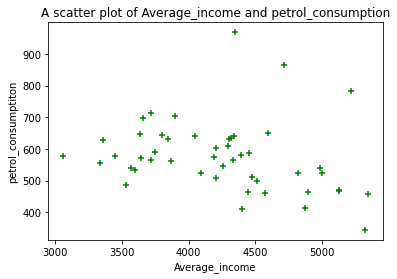

In [8]:
# A scatter plot of Average_income and petrol_consumption

plt.xlabel("Average_income")
plt.ylabel("petrol_consumptiton")
plt.scatter( data = my_data, x="Average_income", y="Petrol_Consumption", marker="+", color="g")
plt.title("A scatter plot of Average_income and petrol_consumption")
plt.show()

In [9]:
my_data.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')

In [ ]:
# Initialising X and y
X=my_data[['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)']]
y= my_data['Petrol_Consumption']


In [12]:
X

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,9.00,3571,1976,0.525
1,9.00,4092,1250,0.572
2,9.00,3865,1586,0.580
3,7.50,4870,2351,0.529
4,8.00,4399,431,0.544
5,10.00,5342,1333,0.571
6,8.00,5319,11868,0.451
7,8.00,5126,2138,0.553
8,8.00,4447,8577,0.529
9,7.00,4512,8507,0.552


In [11]:
y

0     541
1     524
2     561
3     414
4     410
5     457
6     344
7     467
8     464
9     498
10    580
11    471
12    525
13    508
14    566
15    635
16    603
17    714
18    865
19    640
20    649
21    540
22    464
23    547
24    460
25    566
26    577
27    631
28    574
29    534
30    571
31    554
32    577
33    628
34    487
35    644
36    640
37    704
38    648
39    968
40    587
41    699
42    632
43    591
44    782
45    510
46    610
47    524
Name: Petrol_Consumption, dtype: int64

In [14]:
# splitting my_data
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size= 0.3, random_state=42)

In [15]:
# display Splitted data
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((33, 4), (15, 4), (33,), (15,))

In [22]:
# Normalization
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

In [35]:
# initialising Models
svr_model = SVR()
lasso_model= Lasso()

In [39]:
# FITTING Models
svr_model.fit(X_train,y_train)
lasso_model.fit(X_train,y_train)

Lasso()

In [40]:
# Predicting
y_predict_svr =svr_model.predict(X_test)
y_predict_lasso =lasso_model.predict(X_test)

In [52]:
# Evaluation for SVR
mae_svr= mean_absolute_error(y_test,y_predict_svr)
mae_svr


104.09198517791938

In [51]:
mse_svr=mean_squared_error(y_test,y_predict_svr)
mse_svr

20560.58556817278

In [46]:
# Evaluation for LASSO
mae_lasso= mean_absolute_error(y_test,y_predict_lasso)
mae_lasso  #display the mean absolute error

64.55442346464307

In [47]:
mse_lasso= mean_squared_error(y_test, y_predict_lasso)
mse_lasso  #display the mean absolute error

8124.718890895939

Displaying the overall Evaluation for both SVR() and Lasso()


In [54]:
# Display the overall Evaluation
print("mea_svr: ")
print(mae_svr)
print("mse_svr: ")
print(mse_svr)
print("*******************************")
print("mea_lasso: ")
print(mae_lasso)
print("mea_lasso: ")
print(mse_lasso)

mea_svr: 
104.09198517791938
mse_svr: 
20560.58556817278
*******************************
mea_lasso: 
64.55442346464307
mea_lasso: 
8124.718890895939
